In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor

In [2]:
import plotly.express as px

# Load Housing Prediction Data from csv file

In [3]:
data = pd.read_csv('Melbourne_housing_FULL.CSV')

Suburb: Suburb

Address: Address

Rooms: Number of rooms

Price: Price in Australian dollars

Method: S - property sold; SP - property sold prior; PI - property passed in; PN - sold prior not disclosed; SN - sold not disclosed; NB - no bid; VB - vendor bid; W - withdrawn prior to auction; SA - sold after auction; SS - sold after auction price not disclosed. N/A - price or highest bid not available.

Type: br - bedroom(s); h - house,cottage,villa, semi,terrace; u - unit, duplex; t - townhouse; dev site - development site; o res - other residential.

SellerG: Real Estate Agent

Date: Date sold

Distance: Distance from CBD in Kilometres

Regionname: General Region (West, North West, North, North east ...etc)

Propertycount: Number of properties that exist in the suburb.

Bedroom2 : Scraped # of Bedrooms (from different source)

Bathroom: Number of Bathrooms

Car: Number of carspots

Landsize: Land Size in Metres

BuildingArea: Building Size in Metres

YearBuilt: Year the house was built

CouncilArea: Governing council for the area

Lattitude: Self explanitory

Longtitude: Self explanitory

Postcode: Postal Code

## Let's have a look at shape of the dataframe

In [4]:
data.shape

(34857, 21)

## Let's look at column names in dataset

In [5]:
data.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

## Check if all records have "Price". Filter records with "Price" and take that as training set.

In [6]:
data.Price.count() # Some historic records have missing values in target variable

27247

In [7]:
data_no_nulls_in_target = data[~ data.Price.isnull() ] ## Eliminated records"

In [8]:
data_no_nulls_in_target.shape

(27247, 21)

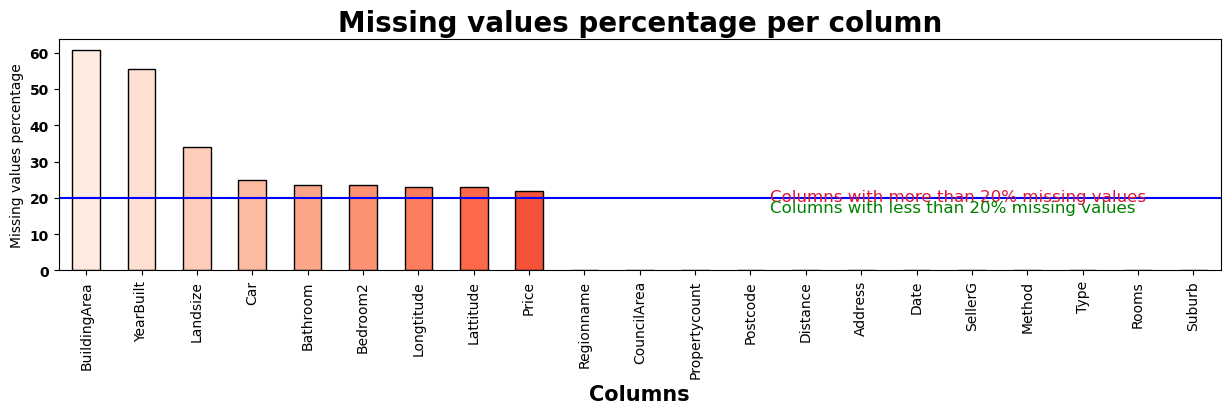

In [9]:
def msv_1(data, thresh = 10, color = 'black', edgecolor = 'black', height = 3, width = 15):
    
    plt.figure(figsize = (width, height))
    percentage = (data.isnull().mean()) * 100
    percentage.sort_values(ascending = False).plot.bar(color = color, edgecolor = edgecolor)
    plt.axhline(y = thresh, color = 'b', linestyle = '-')
    
    plt.title('Missing values percentage per column', fontsize=20, weight='bold' )
    
    plt.text(len(data.isnull().sum()/len(data))/1.7, thresh+2.5, f'Columns with more than {thresh}% missing values', fontsize=12, color='crimson',
         ha='left' ,va='top')
    plt.text(len(data.isnull().sum()/len(data))/1.7, thresh - 0.5, f'Columns with less than {thresh}% missing values', fontsize=12, color='green',
         ha='left' ,va='top')
    plt.xlabel('Columns', size=15, weight='bold')
    plt.ylabel('Missing values percentage')
    plt.yticks(weight ='bold')
    
    return plt.show()
msv_1(data, 20, color=sns.color_palette('Reds',15))

In [10]:
data_no_nulls_in_target.reset_index(drop=True, inplace=True)

In [11]:
data_no_nulls_in_target.to_csv(index=False, path_or_buf='./Melbourne_housing_FULL')

In [12]:
from sklearn.model_selection import ShuffleSplit
shuffleSplit = ShuffleSplit(n_splits=1,test_size = 0.2 , random_state=42)

for train_index, test_index in shuffleSplit.split(data_no_nulls_in_target):
    training_set = data_no_nulls_in_target.loc[train_index]
    test_set = data_no_nulls_in_target.loc[test_index]

## Just to get an idea, let's have a look at first 5 records

In [13]:
training_set.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
17957,Brunswick East,2/20 Lyndhurst Cr,2,u,580000.0,VB,Nelson,26/08/2017,4.0,3057.0,...,1.0,1.0,NaN,61.0,1970.0,Moreland City Council,-37.76134,144.97796,Northern Metropolitan,5533.0
6753,Richmond,21 Lambert St,3,t,1025000.0,SP,Jellis,3/12/2016,2.6,3121.0,...,NaN,NaN,NaN,NaN,NaN,Yarra City Council,NaN,NaN,Northern Metropolitan,14949.0
1833,Brunswick West,11/7 Egginton St,2,t,380000.0,VB,Nelson,7/11/2016,5.9,3055.0,...,1.0,1.0,0.0,85.0,1970.0,Moreland City Council,-37.76070,144.93930,Northern Metropolitan,7082.0
19795,Pascoe Vale,3/246 Cumberland Rd,2,u,456000.0,S,Brad,21/10/2017,8.5,3044.0,...,NaN,NaN,NaN,NaN,NaN,Moreland City Council,NaN,NaN,Northern Metropolitan,7485.0
17054,Glen Waverley,31 Paxton Dr,3,h,1300000.0,S,hockingstuart,19/08/2017,16.7,3150.0,...,2.0,3.0,733.0,NaN,NaN,Monash City Council,-37.89014,145.18269,Eastern Metropolitan,15321.0


# Exploratory Data Analysis

As part of data analysis we refine the data - below are some common activities we do.

* Missing : Check for missing or incomplete data, impute/fillna with appropriate data
* Quality : Check for duplicates, accuracy, unusual data.
* Parse : Prase existing data and create new fearures. e.g. Extract year and month from date
* Convert : Free text to coded value (LabelEncoder, One-Hot-Encoding or LabelBinarizer)
* Derive: Derive new feature out of existing featre/fearues e.g. gender from title Mr. Mrs.
* Calculate percentages, proportion
* Remove: Remove redundant or not so useful data
* Merge: Merge multiple columns e.g. first and surname for full name
* Aggregate e.g. rollup by year, cluster by area
* Filter e.g. exclude based on location
* Sample e.g. extract a representative data
* Summary Pandas describe function or stats like mean

Check if any columns have got nulls

In [14]:
training_set.isnull().any()

Suburb           False
Address          False
Rooms            False
Type             False
Price            False
Method           False
SellerG          False
Date             False
Distance          True
Postcode          True
Bedroom2          True
Bathroom          True
Car               True
Landsize          True
BuildingArea      True
YearBuilt         True
CouncilArea       True
Lattitude         True
Longtitude        True
Regionname        True
Propertycount     True
dtype: bool

## Look at distinct data types in our data

In [15]:
training_set.dtypes.value_counts()

float64    12
object      8
int64       1
dtype: int64

## Check if numerical columns have got nulls.
* If we see below, most of the numerical columns have got nulls.
* Some features like "Postcode", "Lattitude", and "Longtitude" are related features. These three reatures are related to "Address". I am thinking if we can use "Postcode" feature to represent all there.

In [16]:
training_set.select_dtypes(['float64','int64']).isnull().any()

Rooms            False
Price            False
Distance          True
Postcode          True
Bedroom2          True
Bathroom          True
Car               True
Landsize          True
BuildingArea      True
YearBuilt         True
Lattitude         True
Longtitude        True
Propertycount     True
dtype: bool

# Check if categorical/text columns have got nulls.
* "CouncilArea", "Regionname" have got nulls. These two reatures are related to "Address". I am thinking if we can use "Postcode" feature to represent all there.

In [17]:
training_set.select_dtypes(['object']).isnull().any()

Suburb         False
Address        False
Type           False
Method         False
SellerG        False
Date           False
CouncilArea     True
Regionname      True
dtype: bool

Big Decision (importance of Statistical Data Analysis - Bivariate data analysis):
Should we remove "CouncilArea", "Regionname", "Lattitude", and "Longtitude" features and have "Postcode" or "Suburb" as it may represent the address - in other workds, we need to check if "Postcode" or "Suburb" an important feature in predicting "Price" ?
* Before we make a decision we have to fix some problems with "Postcode" column by do some statistical data analysis

- Step 1: Check "Postcode" equal for all the addresses in same "Suburb" (a column with no-nulls). If so, we can write some logic to populate "Postcode" based on "Suburb".
- Step 2: Is "Postcode", "Suburb" an important feature to predict "Price" ?.

In [18]:
df_null_postcodes = training_set[training_set['Postcode'].isnull()]

In [19]:
df_null_postcodes

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
23051,Fawkner Lot,1/3 Brian St,3,h,616000.0,SP,Brad,6/01/2018,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Check if any row with non-null "Suburb" is present for row in "Postcode"

In [20]:
df_null_postcodes[~ df_null_postcodes['Suburb'].isnull()]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
23051,Fawkner Lot,1/3 Brian St,3,h,616000.0,SP,Brad,6/01/2018,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
training_set = training_set[~ training_set['Postcode'].isnull()]

In [22]:
training_set.shape

(21796, 21)

Check if distict "Suburb" have distict "Postcode"

In [23]:
training_set['Suburb'].value_counts().shape

(337,)

In [24]:
training_set['Postcode'].value_counts().shape

(205,)

In [25]:
ser_postcode_suburb = training_set.groupby(['Postcode', 'Suburb']).size()

In [26]:
type(ser_postcode_suburb)

pandas.core.series.Series

In [27]:
ser_postcode_suburb.head(30)

Postcode  Suburb            
3000.0    Melbourne             117
3002.0    East Melbourne         30
3003.0    West Melbourne         37
3006.0    Southbank              46
3008.0    Docklands               6
3011.0    Footscray             168
          Seddon                 76
3012.0    Brooklyn               31
          Kingsville             50
          Maidstone             118
          West Footscray        128
3013.0    Yarraville            194
3015.0    Newport               168
          South Kingsville       24
          Spotswood              38
3016.0    Williamstown          140
          Williamstown North     19
3018.0    Altona                 87
          Seaholme               17
3019.0    Braybrook              64
3020.0    Albion                 53
          Sunshine              137
          Sunshine North         97
          Sunshine West         131
3021.0    Albanvale               7
          Kealba                 32
          Kings Park             10

In [28]:
df_postcode_suburb = training_set.groupby(['Postcode', 'Suburb']).size().reset_index(name='count')

In [29]:
df_postcode_suburb.head(20)

,Postcode,Suburb,count
0,3000.0,Melbourne,117
1,3002.0,East Melbourne,30
2,3003.0,West Melbourne,37
3,3006.0,Southbank,46
4,3008.0,Docklands,6
5,3011.0,Footscray,168
6,3011.0,Seddon,76
7,3012.0,Brooklyn,31
8,3012.0,Kingsville,50
9,3012.0,Maidstone,118


In [30]:
for postcode , group in df_postcode_suburb.groupby(['Postcode']):
    print("Postcode = %s" %(postcode))
    print(25*'*')
    print(group[['Suburb', 'count']])
    print(50*'-')

Postcode = 3000.0
*************************
      Suburb  count
0  Melbourne    117
--------------------------------------------------
Postcode = 3002.0
*************************
           Suburb  count
1  East Melbourne     30
--------------------------------------------------
Postcode = 3003.0
*************************
           Suburb  count
2  West Melbourne     37
--------------------------------------------------
Postcode = 3006.0
*************************
      Suburb  count
3  Southbank     46
--------------------------------------------------
Postcode = 3008.0
*************************
      Suburb  count
4  Docklands      6
--------------------------------------------------
Postcode = 3011.0
*************************
      Suburb  count
5  Footscray    168
6     Seddon     76
--------------------------------------------------
Postcode = 3012.0
*************************
            Suburb  count
7         Brooklyn     31
8       Kingsville     50
9        Maidstone    118
10

      Suburb  count
316  Monbulk      1
--------------------------------------------------
Postcode = 3795.0
*************************
     Suburb  count
317  Silvan      2
--------------------------------------------------
Postcode = 3796.0
*************************
           Suburb  count
318  Mount Evelyn      3
--------------------------------------------------
Postcode = 3802.0
*************************
              Suburb  count
319  Endeavour Hills     16
--------------------------------------------------
Postcode = 3803.0
*************************
     Suburb  count
320  Hallam      7
--------------------------------------------------
Postcode = 3805.0
*************************
           Suburb  count
321  Narre Warren     14
--------------------------------------------------
Postcode = 3806.0
*************************
      Suburb  count
322  Berwick     34
--------------------------------------------------
Postcode = 3807.0
*************************
           Suburb  coun

* Is Postalcode an important feature in predicting Price ?

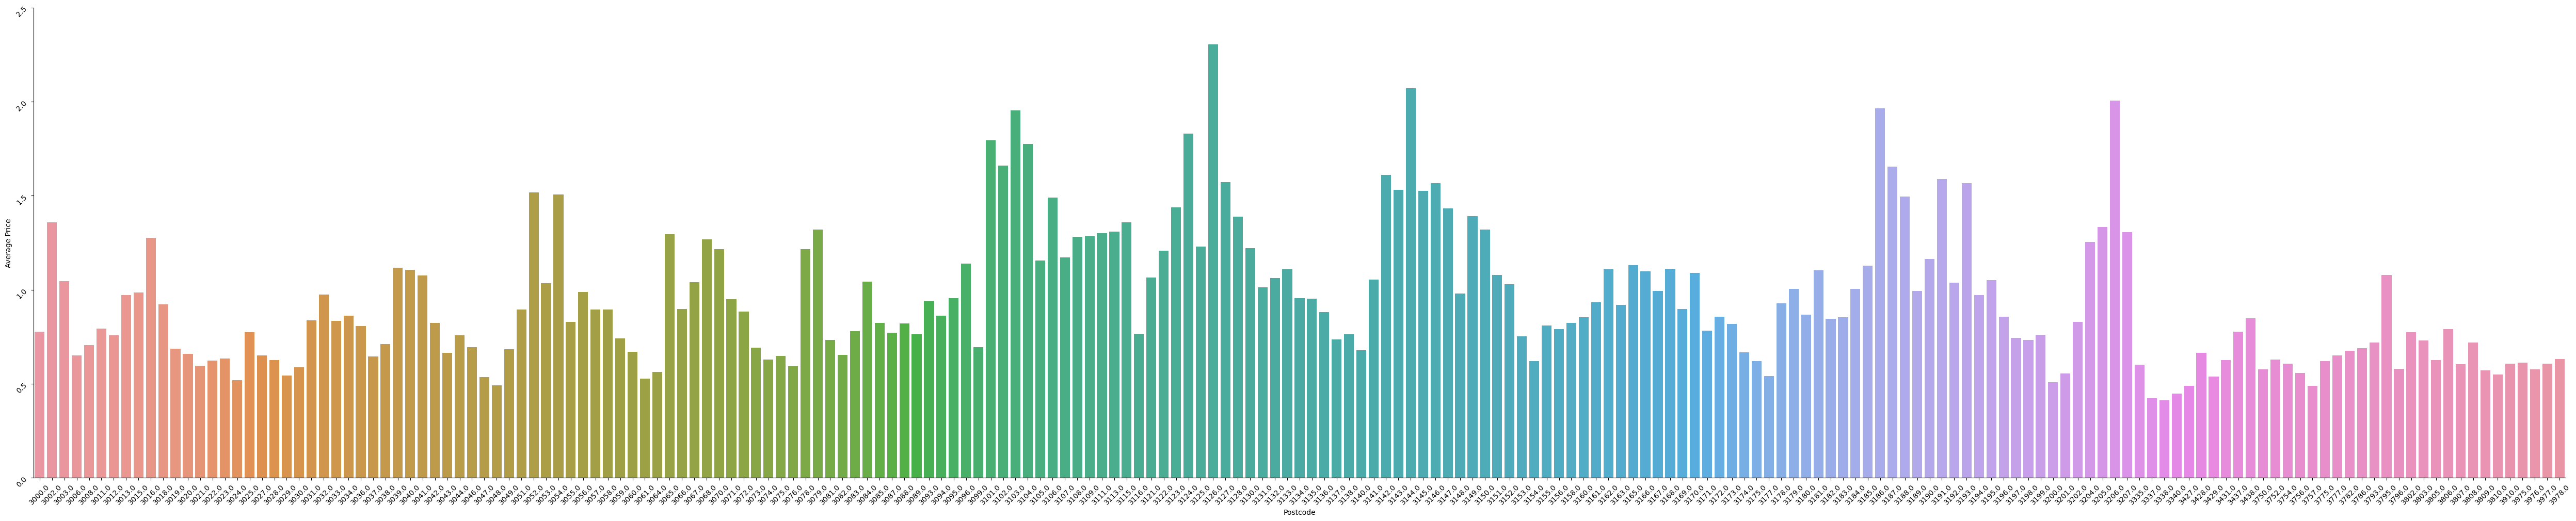

In [31]:
gr = sns.catplot(data=training_set, x="Postcode", y="Price", kind="bar", ci=None,height=10, aspect=5)
plt.xlabel("Postcode")
plt.ylabel("Average Price")
l1 = gr.set_yticklabels(rotation = 45)
l2 = gr.set_xticklabels(rotation = 45)

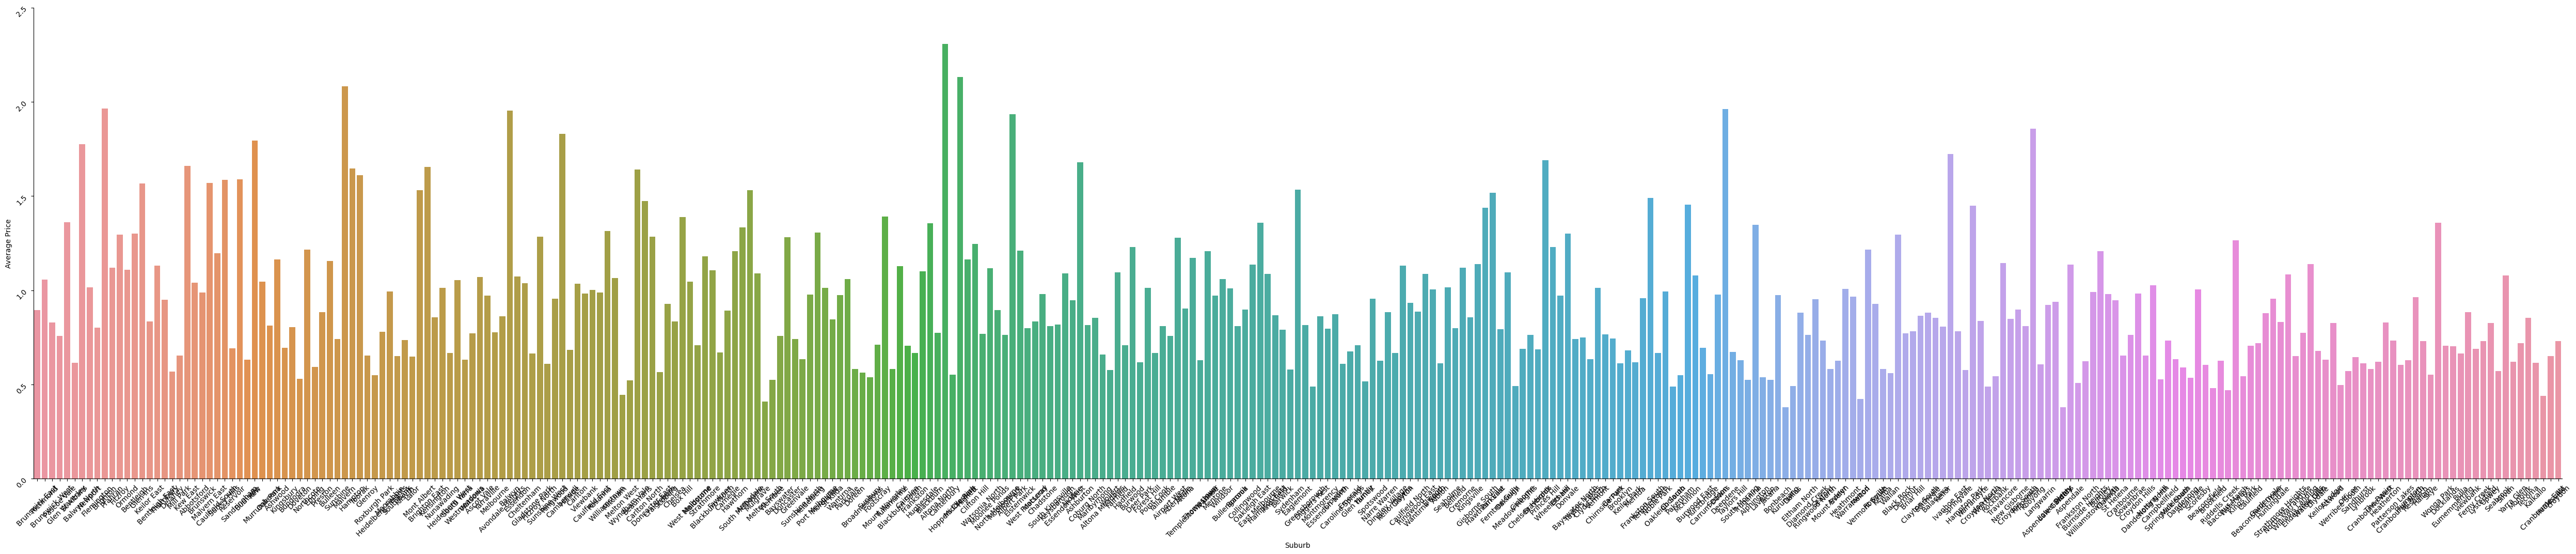

In [32]:
gr = sns.catplot(data=training_set, x="Suburb", y="Price", kind="bar", ci=None,height=10, aspect=5)
plt.xlabel("Suburb")
plt.ylabel("Average Price")
l1 = gr.set_yticklabels(rotation = 45)
l2 = gr.set_xticklabels(rotation = 45)


- Drop "CouncilArea", "Regionname", "Lattitude", "Suburb", "Longtitude"

In [33]:
training_set.drop(["CouncilArea", "Regionname", "Lattitude", "Suburb", "Longtitude","Address"],axis=1, inplace=True)

In [34]:
training_set.columns

Index(['Rooms', 'Type', 'Price', 'Method', 'SellerG', 'Date', 'Distance',
       'Postcode', 'Bedroom2', 'Bathroom', 'Car', 'Landsize', 'BuildingArea',
       'YearBuilt', 'Propertycount'],
      dtype='object')

In [35]:
training_set.head(4)

,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Propertycount
17957,2,u,580000.0,VB,Nelson,26/08/2017,4.0,3057.0,2.0,1.0,1.0,NaN,61.0,1970.0,5533.0
6753,3,t,1025000.0,SP,Jellis,3/12/2016,2.6,3121.0,NaN,NaN,NaN,NaN,NaN,NaN,14949.0
1833,2,t,380000.0,VB,Nelson,7/11/2016,5.9,3055.0,2.0,1.0,1.0,0.0,85.0,1970.0,7082.0
19795,2,u,456000.0,S,Brad,21/10/2017,8.5,3044.0,NaN,NaN,NaN,NaN,NaN,NaN,7485.0


In [36]:
training_set.select_dtypes(['object']).isnull().any()

Type       False
Method     False
SellerG    False
Date       False
dtype: bool

* Date field has got date in string format,
I think it is good to extract sold year as we have YearBuilt in the dataset

In [37]:
import warnings
warnings.filterwarnings("ignore")

In [38]:
training_set.Date = pd.to_datetime(training_set.Date)

In [39]:
training_set["sold_year"] = training_set.Date.apply(lambda x: x.year)

In [40]:
training_set.drop("Date", axis=1, inplace=True)

### EDA (Statistical data analysis) of numerical columns and fixing problems.

In [41]:
training_set.select_dtypes(['float64','int64']).isnull().any()

Rooms            False
Price            False
Distance         False
Postcode         False
Bedroom2          True
Bathroom          True
Car               True
Landsize          True
BuildingArea      True
YearBuilt         True
Propertycount     True
sold_year        False
dtype: bool

In [42]:
training_set[training_set.Bedroom2.isnull()].shape

(5163, 15)

- Bedroom2

<AxesSubplot:>

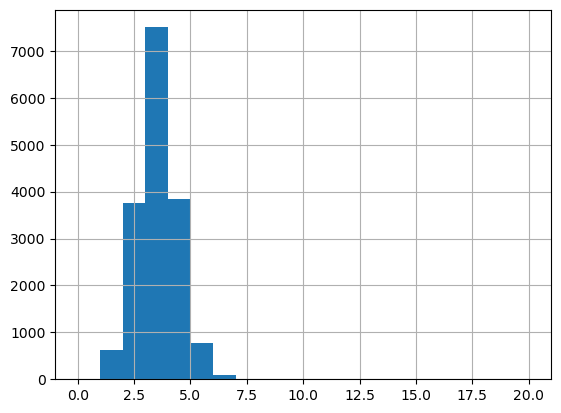

In [43]:
training_set.Bedroom2.hist(bins=20)

 Filling null values with the mean as it is contineous data

In [44]:
training_set.Bedroom2.fillna(value=training_set.Bedroom2.mean(), inplace=True)

- Bathroom

In [45]:
training_set[training_set.Bathroom.isnull()].shape

(5169, 15)

<AxesSubplot:>

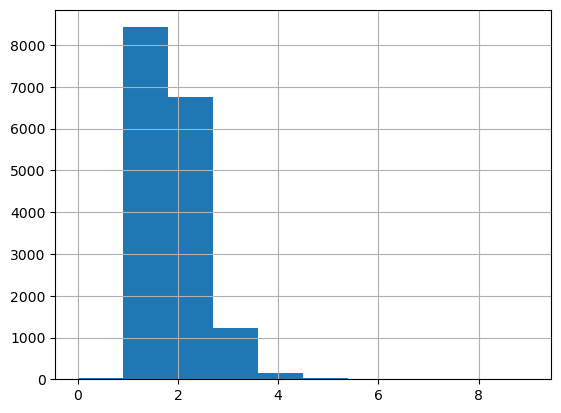

In [46]:
training_set.Bathroom.hist(bins=10)

Filling null values with mode as it is categorical data.

In [47]:
training_set.Bathroom.mode()[0]

1.0

In [48]:
training_set.Bathroom.fillna(value=training_set.Bathroom.mode()[0], inplace=True)

In [49]:
training_set[training_set.Bathroom.isnull()].shape

(0, 15)

- Car

In [50]:
training_set[training_set.Car.isnull()].shape

(5472, 15)

<AxesSubplot:>

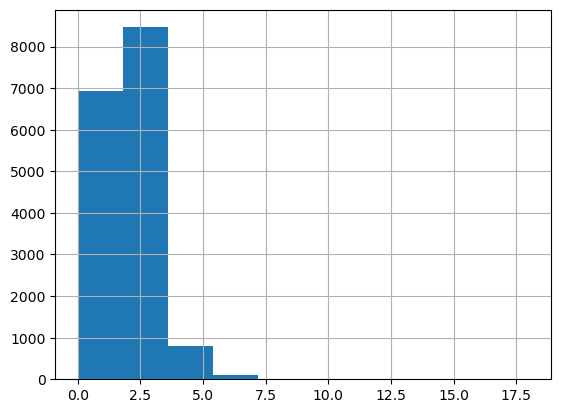

In [51]:
training_set.Car.hist(bins=10)

Filling null values with median as it is Categorical data

In [52]:
training_set.Car.fillna(value=training_set.Car.median(), inplace=True)

In [53]:
training_set[training_set.Car.isnull()].shape

(0, 15)

- Landsize

In [54]:
training_set[training_set.Landsize.isnull()].shape

(7443, 15)

<AxesSubplot:>

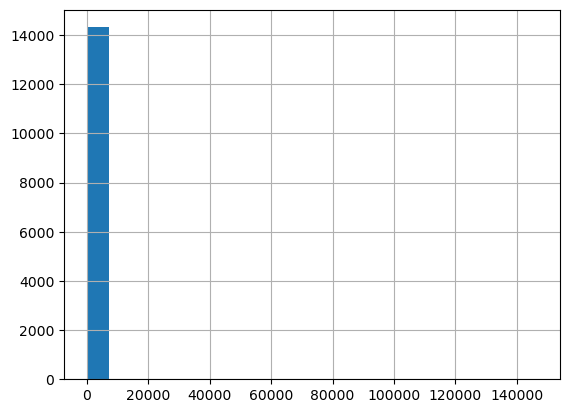

In [55]:
training_set.Landsize.hist(bins=20)

In [56]:
training_set.Landsize.describe()

count     14353.000000
mean        570.962447
std        1956.911573
min           0.000000
25%         220.000000
50%         513.000000
75%         664.000000
max      146699.000000
Name: Landsize, dtype: float64

In [57]:
training_set[training_set.Landsize == 0].shape

(1540, 15)

In [58]:
training_set[training_set.Landsize > 656].shape

(3778, 15)

In [59]:
training_set[training_set.Landsize < 2191].shape

(14159, 15)

In [60]:
training_set[training_set.Landsize < 0].shape

(0, 15)

In [61]:
training_set[~training_set.Landsize.isnull() & training_set.Landsize > 0].shape

(12813, 15)

In [62]:
training_set["Landsize_log"] = np.log(training_set[~training_set.Landsize.isnull() & training_set.Landsize > 0]['Landsize'])

In [63]:
training_set["Landsize_log"].describe()

count    12813.000000
mean         6.127162
std          0.705189
min          0.000000
25%          5.717028
50%          6.315358
75%          6.530878
max         11.896138
Name: Landsize_log, dtype: float64

<AxesSubplot:>

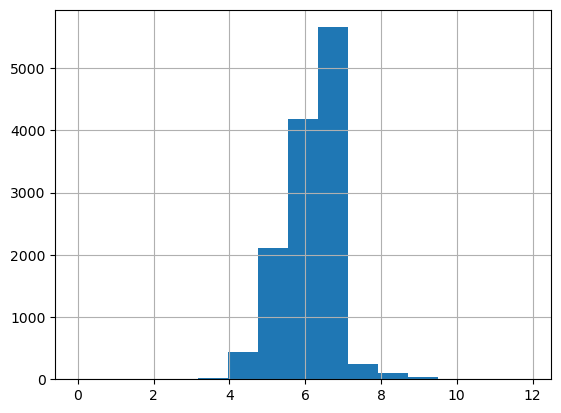

In [64]:
training_set["Landsize_log"].hist(bins=15)

In [65]:
Landsize_log_mean = training_set["Landsize_log"].mean()
training_set["Landsize_log"].fillna(value=Landsize_log_mean, inplace=True)
training_set["Landsize_log"] = training_set["Landsize_log"].apply(lambda x: Landsize_log_mean if x ==0 else x)

In [66]:
training_set.drop('Landsize', axis=1, inplace=True)

In [67]:
training_set.fillna(value= training_set.mean()[["BuildingArea", "YearBuilt", "Propertycount"]], inplace=True)

In [68]:
training_set.isnull().any()

Rooms            False
Type             False
Price            False
Method           False
SellerG          False
Distance         False
Postcode         False
Bedroom2         False
Bathroom         False
Car              False
BuildingArea     False
YearBuilt        False
Propertycount    False
sold_year        False
Landsize_log     False
dtype: bool

In [69]:
training_set.dtypes

Rooms              int64
Type              object
Price            float64
Method            object
SellerG           object
Distance         float64
Postcode         float64
Bedroom2         float64
Bathroom         float64
Car              float64
BuildingArea     float64
YearBuilt        float64
Propertycount    float64
sold_year          int64
Landsize_log     float64
dtype: object

### Interested in knowing more about catagorical/text columns. Once after analysis we have to convert the data to numerical.

- Before we convert catagorical data to numbers, we must see if there is any effect of the "individual catagories" on the mean of the target variable.
- Example if there are 10 houses beloning to Method "S", 100 houses belonging to Method "SP".
Total Price of "S" houses in 100000, Total Price of "SP" houses is 1000000. The avarage (mean) Price of "S" and "SP" houses is same - 10000. That means "statistically" there is no direct effect of Method "S", "SP" on Price variable (note: in business point of view, there might be an effect. Need to check statistical understanding with business analyst). In this scenario we should go with One-Hot-Encoding or Dummy Variable creation. Otherwise we can go with Label Encoding.

In [70]:
training_set.select_dtypes(['object']).columns

Index(['Type', 'Method', 'SellerG'], dtype='object')

In [71]:
training_set['Method'].value_counts()

S     13955
SP     2882
PI     2626
VB     2178
SA      155
Name: Method, dtype: int64

#### Is there a significant effect of different categories in Method on Price

In [72]:
training_set.groupby(['Method'])['Price'].mean()

Method
PI    1.122780e+06
S     1.049267e+06
SA    9.966541e+05
SP    8.802131e+05
VB    1.193416e+06
Name: Price, dtype: float64

Text(9.444444444444445, 0.5, 'Mean Price')

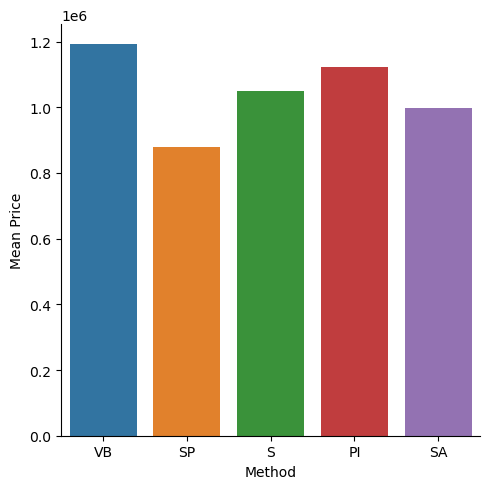

In [73]:
sns.catplot(data=training_set, x="Method", y="Price", kind="bar", ci=None)
plt.ylabel("Mean Price")

#### Above visualization depects that there is a little difference in mean price for different catagories of Method. Need to do hypothesis testing to make sure that this holds true in population

ANOVA: Tukey's Honestly Singnificant Difference test

In [74]:
import statsmodels.stats.multicomp as multi


mc1 = multi.MultiComparison(training_set["Price"],training_set["Method"])
res1 = mc1.tukeyhsd()
print(res1.summary())

       Multiple Comparison of Means - Tukey HSD, FWER=0.05        
group1 group2   meandiff   p-adj     lower        upper     reject
------------------------------------------------------------------
    PI      S  -73512.4251    0.0 -110262.0356  -36762.8145   True
    PI     SA -126125.7769 0.1128 -268931.9387   16680.3849  False
    PI     SP -242566.7525    0.0 -289174.9469  -195958.558   True
    PI     VB   70636.5441 0.0011   20565.7057  120707.3825   True
     S     SA  -52613.3518 0.8422 -192151.3215   86924.6179  False
     S     SP -169054.3274    0.0 -204403.5697 -133705.0851   True
     S     VB  144148.9692    0.0  104345.2759  183952.6625   True
    SA     SP -116440.9756 0.1687 -258893.1953   26011.2441  False
    SA     VB   196762.321 0.0017   53139.8994  340384.7425   True
    SP     VB  313203.2966    0.0  264151.0396  362255.5535   True
------------------------------------------------------------------


Most of the pair wise ANOVA tests show that there is a significance "Price" difference for different catagories of "Method". Hence we can do LabelEncoding

In [75]:
lst_all_method_cats =['S', 'SP','PI','PN','SN','NB','VB','W','SA','SS','N/A']

In [76]:
training_set.Method =pd.Categorical(training_set.Method, categories=lst_all_method_cats)


In [77]:
training_set.Method.value_counts()

S      13955
SP      2882
PI      2626
VB      2178
SA       155
PN         0
SN         0
NB         0
W          0
SS         0
N/A        0
Name: Method, dtype: int64

The data is unbalanced, need to make it look balanced by either Dummies/SMOTE

In [78]:
training_set =pd.get_dummies(training_set, columns=['Method'], prefix=['Method'], drop_first=True)

In [79]:
[col for col in training_set.columns if 'Method' in col ]

['Method_SP',
 'Method_PI',
 'Method_PN',
 'Method_SN',
 'Method_NB',
 'Method_VB',
 'Method_W',
 'Method_SA',
 'Method_SS',
 'Method_N/A']

In [80]:
training_set[[col for col in training_set.columns if 'Method' in col]].head()

,Method_SP,Method_PI,Method_PN,Method_SN,Method_NB,Method_VB,Method_W,Method_SA,Method_SS,Method_N/A
17957,0,0,0,0,0,1,0,0,0,0
6753,1,0,0,0,0,0,0,0,0,0
1833,0,0,0,0,0,1,0,0,0,0
19795,0,0,0,0,0,0,0,0,0,0
17054,0,0,0,0,0,0,0,0,0,0


In [81]:
training_set['Type'].value_counts()

h    14781
u     4733
t     2282
Name: Type, dtype: int64

- Type

In [82]:
training_set.groupby(['Type'])['Price'].mean()

Type
h    1.203264e+06
t    9.375948e+05
u    6.246408e+05
Name: Price, dtype: float64

We see significant difference, hence we can go with Label Encoding

In [83]:
training_set['Type'] = pd.Categorical(training_set['Type'])
training_set['Type'] = training_set['Type'].cat.codes
training_set['Type'].value_counts()

0    14781
2     4733
1     2282
Name: Type, dtype: int64

- SellerG

In [84]:
training_set['SellerG'].value_counts().shape

(330,)

#### Check the behaviour of the top sellers.

In [85]:
top_sellers = list(training_set['SellerG'].value_counts()[training_set['SellerG'].value_counts().values > 100].index)

In [86]:
print(top_sellers)

['Nelson', 'Jellis', 'Barry', 'hockingstuart', 'Ray', 'Buxton', 'Marshall', 'Biggin', 'Fletchers', 'Brad', 'Woodards', 'McGrath', 'Greg', 'YPA', 'Noel', 'Jas', 'Stockdale', 'Miles', 'Sweeney', 'RT', 'Harcourts', 'Gary', 'Hodges', 'Raine', 'HAR', 'Love', 'RW', 'Kay', "O'Brien", 'Williams', 'Village', 'Douglas', 'C21', 'Chisholm', 'Purplebricks']


In [87]:
top_sellers_train_set = training_set[training_set['SellerG'].isin(top_sellers)]

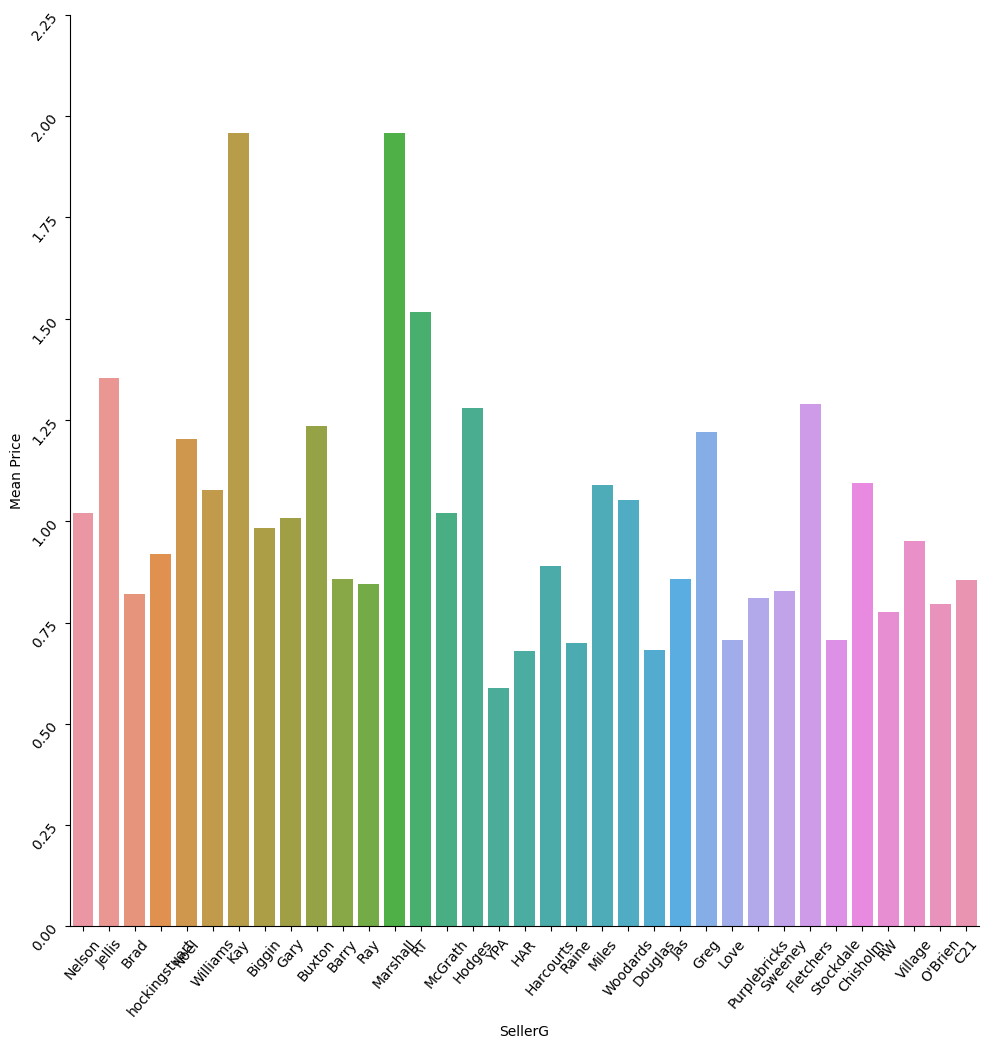

In [88]:
top_sel = sns.catplot(data=top_sellers_train_set, x="SellerG", y="Price", kind="bar", height=10, ci=None)
plt.ylabel("Mean Price")
l1 = top_sel.set_yticklabels(rotation = 50)
l2 = top_sel.set_xticklabels(rotation = 50)

We see significant difference, hence we can go with Label Encoding


In [89]:
training_set['SellerG'] = pd.Categorical(training_set['SellerG'])
training_set['SellerG'] = training_set['SellerG'].cat.codes
training_set['SellerG'].value_counts().head()

199    2174
138    2047
21     1919
319    1694
245    1263
Name: SellerG, dtype: int64

## Now data is ready, lets build a Linear Regression model with SGDRegressor

In [90]:
training_set.dtypes

Rooms              int64
Type                int8
Price            float64
SellerG            int16
Distance         float64
Postcode         float64
Bedroom2         float64
Bathroom         float64
Car              float64
BuildingArea     float64
YearBuilt        float64
Propertycount    float64
sold_year          int64
Landsize_log     float64
Method_SP          uint8
Method_PI          uint8
Method_PN          uint8
Method_SN          uint8
Method_NB          uint8
Method_VB          uint8
Method_W           uint8
Method_SA          uint8
Method_SS          uint8
Method_N/A         uint8
dtype: object

In [91]:
input_features = [x for x in training_set.columns if x not in ['Price']]

In [92]:
input_features

['Rooms',
 'Type',
 'SellerG',
 'Distance',
 'Postcode',
 'Bedroom2',
 'Bathroom',
 'Car',
 'BuildingArea',
 'YearBuilt',
 'Propertycount',
 'sold_year',
 'Landsize_log',
 'Method_SP',
 'Method_PI',
 'Method_PN',
 'Method_SN',
 'Method_NB',
 'Method_VB',
 'Method_W',
 'Method_SA',
 'Method_SS',
 'Method_N/A']

In [93]:
X_train = training_set[input_features].values
y_train = training_set['Price'].values

In [94]:
lr = LinearRegression()

lr_model = lr.fit(X_train, y_train)

In [95]:
y_train_pred = lr_model.predict(X_train)

In [96]:
from sklearn.metrics import r2_score
r2 = r2_score(y_train, y_train_pred)
print(r2)

0.48467536024042435


### Error analysis and finetuning the model

In [97]:
residuals = y_train - y_train_pred

In [98]:
def standard_scale(val):
    mean_vals = np.mean(val)
    std_vals = np.std(val)
    z_vals = [(x - mean_vals)/std_vals for x in val]
    return z_vals

In [99]:
def plotScatterPlot(residuals, y):
    std_residuals = standard_scale(residuals)
    std_predicted = standard_scale(y)
    plt.scatter(std_predicted, std_residuals, alpha = 0.6, color='y')
    l = plt.axhline(y=0, color='r')
    plt.xlabel('STD Predicted values')
    plt.ylabel('STD Residual values')
    plt.axis([-6, 6, -10, 10])
    plt.show()

### plotScatterPlot(residuals, y_train_pred)

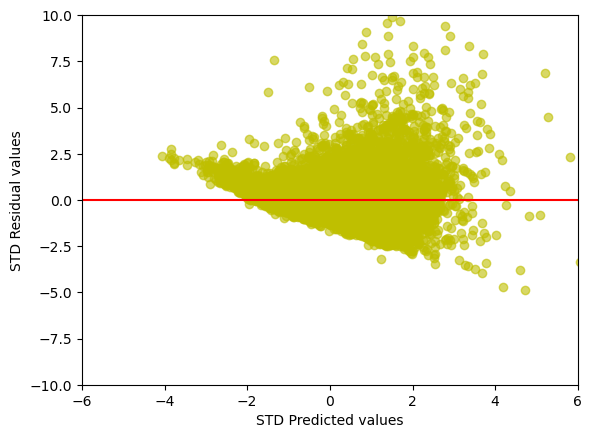

In [100]:
plotScatterPlot(residuals, y_train_pred)

### We found heteroscedasticity in the dataset, one of the solution is the apply log transormation on y variable, build model. Let's try that.

In [101]:
type(y_train)

numpy.ndarray

In [102]:
y_train_log = np.log(y_train)

In [103]:
lr_model = lr_model.fit(X_train, y_train_log)

In [104]:
y_train_log_pred = lr_model.predict(X_train)

In [105]:
r2 = r2_score(y_train_log, y_train_log_pred)
print(r2)

0.5775719437885163


In [106]:
res = y_train_log - y_train_log_pred

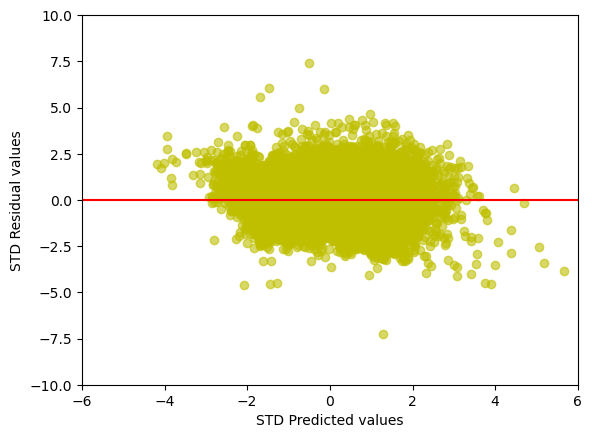

In [107]:
plotScatterPlot(res, y_train_log_pred)

In [108]:
from sklearn.ensemble import GradientBoostingRegressor
gbrt = GradientBoostingRegressor(max_depth=4, n_estimators=300, learning_rate=0.1, random_state=42)
gbrt.fit(X_train, y_train)
y_pred_gbrt = gbrt.predict(X_train)

In [109]:
r2 = r2_score(y_train, y_pred_gbrt)
print(r2)

0.8431136902758644


### Apply model on TEST set and finetune model

In [110]:
test_set = test_set.drop(test_set[test_set['Postcode'].isnull()].index)

test_set.drop(["Address", "CouncilArea", "Regionname", "Lattitude", "Suburb", "Longtitude"], axis=1, inplace=True)

test_set.Date = pd.to_datetime(test_set.Date)
test_set["sold_year"] = test_set.Date.apply(lambda x: x.year)
test_set.drop("Date", axis=1, inplace=True)

test_set.Bedroom2.fillna(value=test_set.Bedroom2.mean(), inplace=True)
test_set.Bathroom.fillna(value=test_set.Bathroom.mean(), inplace=True)
test_set.Car.fillna(value=test_set.Car.median(), inplace=True)

test_set["Landsize_log"] = np.log(test_set[~test_set.Landsize.isnull() & test_set.Landsize > 0]['Landsize'])
Landsize_log_mean = test_set["Landsize_log"].mean()
test_set["Landsize_log"].fillna(value=Landsize_log_mean, inplace=True)
test_set["Landsize_log"] = test_set["Landsize_log"].apply(lambda x: Landsize_log_mean if x == 0 else x) 
test_set.drop('Landsize', axis=1, inplace=True)

test_set.fillna(value= test_set.mean()[["BuildingArea", "YearBuilt", "Propertycount"]], inplace=True)

lst_all_method_cats = ['S', 'SP','PI','PN','SN','NB','VB','W','SA','SS','N/A']
test_set.Method = pd.Categorical(test_set.Method, categories=lst_all_method_cats)
test_set = pd.get_dummies(test_set, columns=["Method"], prefix=["Method"], drop_first=True)

test_set['Type'] = pd.Categorical(test_set['Type'])
test_set['Type'] = test_set['Type'].cat.codes

test_set['SellerG'] = pd.Categorical(test_set['SellerG'])
test_set['SellerG'] = test_set['SellerG'].cat.codes

In [111]:
input_features = [x for x in training_set.columns if x not in ['Price']]

X_test = test_set[input_features].values
y_test = test_set['Price'].values

In [112]:
y_test_pred_gbrt = gbrt.predict(X_test)

In [113]:
r2 = r2_score(y_test, y_test_pred_gbrt)
print(r2)

0.7510321188010318
